# **4 Python Static**
파이썬을 활용한 금융분석

<br>
### **review Python Data & Datum**
Python 기본문법 - 기본문법 등을 아래의 3가지 서랍속에 체계적 정리하기 
1. Datum &nbsp;&nbsp; : &nbsp;&nbsp; 숫자, &nbsp;"문자" 
1. Data &nbsp;&nbsp; : &nbsp; [list], &nbsp; {dict}, &nbsp; (tuple,)
1. Function : indent, 모듈, 클래스, 함수, 메소드(추가 입력값 필요, 추가 입력값 불필요)
1. []의 함수적 활용 
    1. 색인기능 [index], [:slicing])
    1. 함수를 활용하여 데이터 생성 &nbsp; [ &nbsp; datum &nbsp;&nbsp; 1) for : 반복, 2) if :판단, 3) enumerate() :순번 integer 출력 ]
1. {}의 함수적 활용 
    1. 함수를 활용하여 데이터 생성 &nbsp; { &nbsp; key &nbsp; : &nbsp; value &nbsp;&nbsp; 1) for : 반복, 2) if :판단, 3) enumerate() :순번 integer 출력}
1. 연결기호 : ', ", '=',  [], {}, () (개별적 쓰임새와 숨은 의미들이 정해져 있다)

### **review Series**
1. pd.Series( [ data ] , index = [ index ])
1. series 사칙연산
1. series [ Boolean 판단문 ]
1. series.index = [ list ]
1. series.isnull()
1. series.drop()

### **review DataFrame**
1. pd.DataFrame( { columns :  [ data ] , columns :  [ data ] } )
1. df.column이름
1. df.rename( columns = { 기존 column , 새로운 column } )
1. df.insert( 컬럼순서,  컬럼명 ,  data )
1. df [ index Slicing ]
1. df.iloc[ index slicing,  column slicing ]
1. df.reset_index()        :  index  -> column
1. df.set_index( '컬럼명' ) :  column -> index
1. df.sort_index()
1. df.sort_value()
1. df[ boolean 함수 ]
1. df[ boolean 함수 ].column이름
1. axis = 0 : index | axis = 1 : column
1. df.drop( 'index이름'  , axis = 0 )
1. df.drop( 'column이름' ,  axis = 1 )
1. df.index.tolist()
1. df.column.tolist()

<br>
## **1 기술통계 계산과 요약**
기본적인 수학/ 통계 메소드(함수)
1. .count()
1. .describe()
1. .min()     .max()
1. .idxmin()  .idxmax()
1. .quantile()   
1. .sum()
1. .mean()    .median()
1. .var() 분산 .std() 정규분산
1. .cumsum()  .cumprod()  누적 합    누적 곱
1. .cummin()  .cummax()   누적최소값, 누적최대값

<br>
### **01 기술통계**
엑셀의 함수를 더 쉽고, 빠르게 적용 가능하다

In [1]:
import pandas as pd
import numpy as np
data = np.arange(20).reshape((4,5))
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [2]:
df = pd.DataFrame(data, 
                  index   = ['three', 'one', 'two', 'five'], 
                  columns = [ 'd', 'e', 'f', 'a', 'g'])
df

d   e   f   a   g
three   0   1   2   3   4
one     5   6   7   8   9
two    10  11  12  13  14
five   15  16  17  18  19

In [3]:
# 분위 결과값 계산하기
# q = 0.25, 5, 0.75
df.quantile(q=0.05)

d    0.75
e    1.75
f    2.75
a    3.75
g    4.75
Name: 0.05, dtype: float64

In [4]:
# 개별 컬럼의 합을 계산한 결과를 출력
# default :  axis = 0 , skipna = False 
# na값을 포함/ 제외하고 계산할 여부를 확인

df.sum( ) 

d    30
e    34
f    38
a    42
g    46
dtype: int64

In [5]:
df.sum( axis = 1 )

three    10
one      35
two      60
five     85
dtype: int64

In [6]:
# column 별 평균을 계산
df.mean( axis=0 , skipna = False )  # .tolist()

d     7.5
e     8.5
f     9.5
a    10.5
g    11.5
dtype: float64

In [7]:
# column 숫자 출력하기
df.count()

d    4
e    4
f    4
a    4
g    4
dtype: int64

In [8]:
# column 별 누적 합
df.cumsum()

d   e   f   a   g
three   0   1   2   3   4
one     5   7   9  11  13
two    15  18  21  24  27
five   30  34  38  42  46

In [9]:
# column 별 누적 곱
df.cumprod()

d     e     f     a     g
three  0     1     2     3     4
one    0     6    14    24    36
two    0    66   168   312   504
five   0  1056  2856  5616  9576

In [10]:
df.describe()

d          e          f          a          g
count   4.000000   4.000000   4.000000   4.000000   4.000000
mean    7.500000   8.500000   9.500000  10.500000  11.500000
std     6.454972   6.454972   6.454972   6.454972   6.454972
min     0.000000   1.000000   2.000000   3.000000   4.000000
25%     3.750000   4.750000   5.750000   6.750000   7.750000
50%     7.500000   8.500000   9.500000  10.500000  11.500000
75%    11.250000  12.250000  13.250000  14.250000  15.250000
max    15.000000  16.000000  17.000000  18.000000  19.000000

In [11]:
df.pct_change() # 퍼센트 변화율을 출력

d         e         f         a         g
three       NaN       NaN       NaN       NaN       NaN
one         inf  5.000000  2.500000  1.666667  1.250000
two    1.000000  0.833333  0.714286  0.625000  0.555556
five   0.500000  0.454545  0.416667  0.384615  0.357143

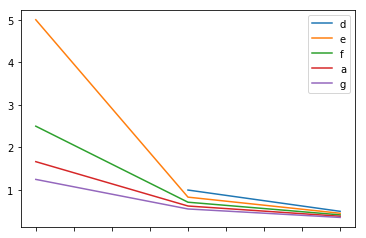

In [12]:
%matplotlib inline
df.pct_change().plot(kind='line')

<br>
<br>
## **2 결측치(np.Nan) 제어하기**
<br>
### **01 결측치(np.Nan) 찾기**
전체의 표로 연산을 하려면, Table 데이터가 깨끗해야 한다
1.  sum(), cumsum() methods 계산 시 : NaN은 '0'으로 처리
1. mean(), std() 연산 시 : NaN은 분석 대상(population)에서 제외
1. DataFrame 칼럼 간 연산 시 : NaN이 하나라도 있으면 NaN 반환

출처: http://rfriend.tistory.com/261?category=675917 [R, Python 분석과 프로그래밍 (by R Friend)]

In [13]:
data  = pd.Series([20000,1200,2500],  index = ['매출액', '영업이익' ,'대손충당금'])
data2 = pd.Series([34000,120,360],    index = ['매출액', '당기순이익','대손충당금'])
df = pd.DataFrame( {'2017Y4Q': data, '2018Y1Q': data2 },
                 index = ['매출액', '영업이익', '당기순이익', '대손충당금']) 
df

2017Y4Q  2018Y1Q
매출액    20000.0  34000.0
영업이익    1200.0      NaN
당기순이익      NaN    120.0
대손충당금   2500.0    360.0

In [14]:
# 결측값을 제외한 데이터를 출력 
df.dropna()

2017Y4Q  2018Y1Q
매출액    20000.0  34000.0
대손충당금   2500.0    360.0

In [15]:
# 결측치 데이터 위치 찾기
print(df.isnull().sum())
print('\n2017Y4Q', df[df['2017Y4Q'].isnull()].index)
print('\n2018Y1Q', df[df['2018Y1Q'].isnull()].index)

2017Y4Q    1
2018Y1Q    1
dtype: int64

2017Y4Q Index(['당기순이익'], dtype='object')

2018Y1Q Index(['영업이익'], dtype='object')


<br>
### **02 결측치(np.Nan) 채우기**
전체의 표로 연산을 하려면, Table 데이터가 깨끗해야 한다

In [16]:
df.fillna(0)

2017Y4Q  2018Y1Q
매출액    20000.0  34000.0
영업이익    1200.0      0.0
당기순이익      0.0    120.0
대손충당금   2500.0    360.0

In [17]:
# fill gaps forward  앞방향 데이터로 채우기
# limit=2 : 앞에서 끌어오는 데이터의 갯수를 제한하기
df.fillna(method='ffill',  limit=2)  

2017Y4Q  2018Y1Q
매출액    20000.0  34000.0
영업이익    1200.0  34000.0
당기순이익   1200.0    120.0
대손충당금   2500.0    360.0

In [18]:
# fill gaps backword  뒷방향 데이터로 채우기
df.fillna(method='bfill')

2017Y4Q  2018Y1Q
매출액    20000.0  34000.0
영업이익    1200.0    120.0
당기순이익   2500.0    120.0
대손충당금   2500.0    360.0

In [19]:
# 평균 값으로 채우기
df.fillna(df.mean())                # 개별 columns의 평균으로 채우기

2017Y4Q       2018Y1Q
매출액    20000.0  34000.000000
영업이익    1200.0  11493.333333
당기순이익   7900.0    120.000000
대손충당금   2500.0    360.000000

In [20]:
df.fillna(df.mean()['2017Y4Q'])   # 'first_col 컬럼의 평균으로 채우기

2017Y4Q  2018Y1Q
매출액    20000.0  34000.0
영업이익    1200.0   7900.0
당기순이익   7900.0    120.0
대손충당금   2500.0    360.0

<br>
### **03 결측치(np.Nan) 보간법으로 대체하기**
단일값이 아닌 규칙에 근거한 결측치 대체
1. Series.interpolate()
1. Series.interpolate(method='time')
1. Series.interpolate(method='values')
1. Series.interpolate(method='values', limit=1) 
1. Series.interpolate(method='values', limit=1, limit_direction='backward') # 'forward','backward','both'

In [21]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
from datetime import datetime

# making TimeSeries with missing values
datestrs   = ['12/1/2016', '12/03/2016', '12/04/2016', '12/10/2016']
dates      = pd.to_datetime(datestrs)
timeSeries = Series([1, np.nan, np.nan, 10], index=dates)
# http://rfriend.tistory.com/264?category=675917 [R, Python 분석과 프로그래밍 (by R Friend)]
print(timeSeries.index)
timeSeries

DatetimeIndex(['2016-12-01', '2016-12-03', '2016-12-04', '2016-12-10'], dtype='datetime64[ns]', freq=None)


2016-12-01     1.0
2016-12-03     NaN
2016-12-04     NaN
2016-12-10    10.0
dtype: float64

2016-12-01     1.0
2016-12-03     4.0
2016-12-04     7.0
2016-12-10    10.0
dtype: float64

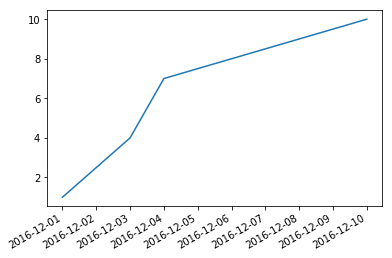

In [22]:
%matplotlib inline
# "선형비례"로 데이터를 보간한다
timeSeries.interpolate().plot()
timeSeries.interpolate()

2016-12-01     1.0
2016-12-03     3.0
2016-12-04     4.0
2016-12-10    10.0
dtype: float64

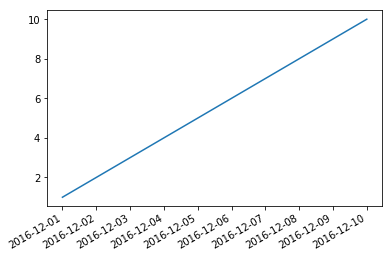

In [23]:
# 시계열 날짜 index를 기준으로 결측값 보간
timeSeries.interpolate(method='time').plot()
timeSeries.interpolate(method='time')

2016-12-01     1.0
2016-12-03     3.0
2016-12-04     4.0
2016-12-10    10.0
dtype: float64

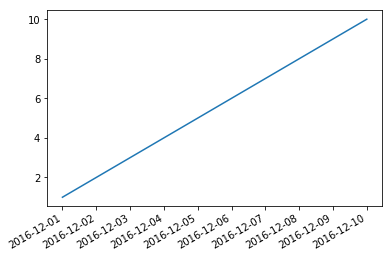

In [24]:
# value값에 비례하여 선형으로 보간한다
timeSeries.interpolate(method='values').plot()
timeSeries.interpolate(method='values')

In [25]:
# 보간의 갯수를 제한
timeSeries.interpolate(method='values', limit=1)

2016-12-01     1.0
2016-12-03     3.0
2016-12-04     NaN
2016-12-10    10.0
dtype: float64

In [26]:
# 보간의 갯수 와 방향을 제한
timeSeries.interpolate(method='values', limit=1, limit_direction='backward') # 'forward','backward','both'

2016-12-01     1.0
2016-12-03     NaN
2016-12-04     4.0
2016-12-10    10.0
dtype: float64

<br><br>
## **3. Time Series**
시계열 데이터 처리하기

<br>
### **01 DateTimeSeries**
시간 데이터 관리하기

In [27]:
from time import time
time()   
# sec 단위로 출력 : float

1524475408.2237036

In [28]:
# 일반적 Coding 에서의 용도
# Cell 내부 연산하는데 걸린시간 확인하기
t0 = time()
for i in range(100_000_000):
    pass
int( time() - t0 )

3

<br>
### **02 Date & Time**
날짜와 시간관리

In [29]:
# Date and time
from datetime import datetime
dt = datetime.now()
dt

datetime.datetime(2018, 4, 23, 18, 23, 31, 424351)

In [30]:
# 메소드 객체를 통해서 일부 데이터 출력
# 날짜 정보의 필요한 부분만 출력가능
print('year'     , dt.year, 
      '\nmonth'  , dt.month, 
      '\nday'    , dt.day, 
      '\nhour'   , dt.hour, 
      '\nminute' , dt.minute, 
      '\nsecond' , dt.second, 
      dt.microsecond)

year 2018 
month 4 
day 23 
hour 18 
minute 23 
second 31 424351


<br>
### **03 Time stamp  & Date**
날짜와 시간관리 데이터 상호교환

In [31]:
# time stamp 시초값 추출
datetime.fromtimestamp(0)

datetime.datetime(1970, 1, 1, 9, 0)

In [32]:
# time() 결과를 Datetime 형식으로 변환
now = time()
print(now)
datetime.fromtimestamp(now)

1524475411.4496546


datetime.datetime(2018, 4, 23, 18, 23, 31, 449655)

In [33]:
# 임의의 기간을 datetime 포맷으로 변환하기
date = datetime(2017, 10, 21, 16, 29, 0)
date

datetime.datetime(2017, 10, 21, 16, 29)

In [34]:
# datetime 출력포맷 임의로 변경하기
date.strftime('%Y/%m/%d %H:%M:%S')

'2017/10/21 16:29:00'

In [35]:
# datetime 출력포맷 임의로 변경하기
date.strftime('%Y/%m/%d')

'2017/10/21'

In [36]:
# datetime 출력포맷 임의로 변경하기
date.strftime('%Y-%m-%d')

'2017-10-21'

<br>
### **04 Datetime in Pandas** 
**Series.resample()** freq 옵션 [code](https://datascienceschool.net/view-notebook/8959673a97214e8fafdb159f254185e9/)
1. **B :** 주말이 아닌 평일
1. **W :** 주(일요일)
1. **W-MON :** 주(월요일)
1. **M :** 각 달(month)의 마지막 날
1. **MS :** 각 달의 첫날
1. **BM :** 주말이 아닌 평일 중에서 각 달의 마지막 날
1. **BMS :** 주말이 아닌 평일 중에서 각 달의 첫날
1. **WOM-2THU :** 각 달의 두번째 목요일
1. **Q-JAN :** 각 분기의 첫달의 마지막 날
1. **Q-DEC :** 각 분기의 마지막 달의 마지막 날

<br>
#### **1) pandas.date_range()**
규칙적인 일별데이터가 필요할 떄

In [37]:
pd.date_range('2017/01/01','2017/01/31')

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
               '2017-01-13', '2017-01-14', '2017-01-15', '2017-01-16',
               '2017-01-17', '2017-01-18', '2017-01-19', '2017-01-20',
               '2017-01-21', '2017-01-22', '2017-01-23', '2017-01-24',
               '2017-01-25', '2017-01-26', '2017-01-27', '2017-01-28',
               '2017-01-29', '2017-01-30', '2017-01-31'],
              dtype='datetime64[ns]', freq='D')

In [38]:
pd.date_range('2017-07-01', periods=30)

DatetimeIndex(['2017-07-01', '2017-07-02', '2017-07-03', '2017-07-04',
               '2017-07-05', '2017-07-06', '2017-07-07', '2017-07-08',
               '2017-07-09', '2017-07-10', '2017-07-11', '2017-07-12',
               '2017-07-13', '2017-07-14', '2017-07-15', '2017-07-16',
               '2017-07-17', '2017-07-18', '2017-07-19', '2017-07-20',
               '2017-07-21', '2017-07-22', '2017-07-23', '2017-07-24',
               '2017-07-25', '2017-07-26', '2017-07-27', '2017-07-28',
               '2017-07-29', '2017-07-30'],
              dtype='datetime64[ns]', freq='D')

In [39]:
pd.date_range(end = '2017-07-01', periods=30)

DatetimeIndex(['2017-06-02', '2017-06-03', '2017-06-04', '2017-06-05',
               '2017-06-06', '2017-06-07', '2017-06-08', '2017-06-09',
               '2017-06-10', '2017-06-11', '2017-06-12', '2017-06-13',
               '2017-06-14', '2017-06-15', '2017-06-16', '2017-06-17',
               '2017-06-18', '2017-06-19', '2017-06-20', '2017-06-21',
               '2017-06-22', '2017-06-23', '2017-06-24', '2017-06-25',
               '2017-06-26', '2017-06-27', '2017-06-28', '2017-06-29',
               '2017-06-30', '2017-07-01'],
              dtype='datetime64[ns]', freq='D')

In [40]:
# B : 영업일 (주말은 제외)
pd.date_range(end = '2017-07-01', periods=30, freq='B')  

DatetimeIndex(['2017-05-22', '2017-05-23', '2017-05-24', '2017-05-25',
               '2017-05-26', '2017-05-29', '2017-05-30', '2017-05-31',
               '2017-06-01', '2017-06-02', '2017-06-05', '2017-06-06',
               '2017-06-07', '2017-06-08', '2017-06-09', '2017-06-12',
               '2017-06-13', '2017-06-14', '2017-06-15', '2017-06-16',
               '2017-06-19', '2017-06-20', '2017-06-21', '2017-06-22',
               '2017-06-23', '2017-06-26', '2017-06-27', '2017-06-28',
               '2017-06-29', '2017-06-30'],
              dtype='datetime64[ns]', freq='B')

In [41]:
# BM : 월 영업 마감일
pd.date_range(end = '2017-07-01', periods=30, freq='BM')  

DatetimeIndex(['2015-01-30', '2015-02-27', '2015-03-31', '2015-04-30',
               '2015-05-29', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-30', '2015-11-30', '2015-12-31',
               '2016-01-29', '2016-02-29', '2016-03-31', '2016-04-29',
               '2016-05-31', '2016-06-30', '2016-07-29', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-30',
               '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-28',
               '2017-05-31', '2017-06-30'],
              dtype='datetime64[ns]', freq='BM')

In [42]:
# 시간정보를 포함해서 일자를 나열할 떄
pd.date_range('2017/8/8 09:09:09', periods=5)  #, normalize=True)

DatetimeIndex(['2017-08-08 09:09:09', '2017-08-09 09:09:09',
               '2017-08-10 09:09:09', '2017-08-11 09:09:09',
               '2017-08-12 09:09:09'],
              dtype='datetime64[ns]', freq='D')

In [43]:
# 시간정보를 '자정'으로 '정규화'가 필요할 떄
pd.date_range('2017/8/8 09:09:09', periods=5, normalize=True)

DatetimeIndex(['2017-08-08', '2017-08-09', '2017-08-10', '2017-08-11',
               '2017-08-12'],
              dtype='datetime64[ns]', freq='D')

In [44]:
# 시간정보를 '시간'간격으로 필요할 떄
pd.date_range('2017/8/1 12:12:12','2017/8/4', freq='4h')

DatetimeIndex(['2017-08-01 12:12:12', '2017-08-01 16:12:12',
               '2017-08-01 20:12:12', '2017-08-02 00:12:12',
               '2017-08-02 04:12:12', '2017-08-02 08:12:12',
               '2017-08-02 12:12:12', '2017-08-02 16:12:12',
               '2017-08-02 20:12:12', '2017-08-03 00:12:12',
               '2017-08-03 04:12:12', '2017-08-03 08:12:12',
               '2017-08-03 12:12:12', '2017-08-03 16:12:12',
               '2017-08-03 20:12:12'],
              dtype='datetime64[ns]', freq='4H')

In [45]:
# 시간정보를 '시간 분'간격으로 필요할 떄
pd.date_range('2017/8/1','2017/8/2', freq='1h30min')

DatetimeIndex(['2017-08-01 00:00:00', '2017-08-01 01:30:00',
               '2017-08-01 03:00:00', '2017-08-01 04:30:00',
               '2017-08-01 06:00:00', '2017-08-01 07:30:00',
               '2017-08-01 09:00:00', '2017-08-01 10:30:00',
               '2017-08-01 12:00:00', '2017-08-01 13:30:00',
               '2017-08-01 15:00:00', '2017-08-01 16:30:00',
               '2017-08-01 18:00:00', '2017-08-01 19:30:00',
               '2017-08-01 21:00:00', '2017-08-01 22:30:00',
               '2017-08-02 00:00:00'],
              dtype='datetime64[ns]', freq='90T')

<br>
#### **2) Datetime 데이터 포맷의 변환**
사용자에게 유용한 형태로 변환하기
1. .strftime()
1. .isocalendar()

In [46]:
# 결과로 출력할 포맷을 변경
date_list = pd.date_range('2017/01/01','2017/01/11')
for date in date_list:
    print(date.strftime('%Y-%m-%d %H:%M:%S'))

2017-01-01 00:00:00
2017-01-02 00:00:00
2017-01-03 00:00:00
2017-01-04 00:00:00
2017-01-05 00:00:00
2017-01-06 00:00:00
2017-01-07 00:00:00
2017-01-08 00:00:00
2017-01-09 00:00:00
2017-01-10 00:00:00
2017-01-11 00:00:00


In [47]:
# 결과로 출력할 포맷을 변경
date_list = pd.date_range('2017/01/01','2017/01/11')
for date in date_list:
    print(date.strftime('%Y-%m-%d'))

2017-01-01
2017-01-02
2017-01-03
2017-01-04
2017-01-05
2017-01-06
2017-01-07
2017-01-08
2017-01-09
2017-01-10
2017-01-11


In [48]:
# 결과로 출력할 포맷을 변경 - list 포맷으로 출력
date_list = pd.date_range('2017/01/01', '2017/01/11')
date      = [date.strftime('%Y-%m-%d')   for date in date_list]
date

['2017-01-01',
 '2017-01-02',
 '2017-01-03',
 '2017-01-04',
 '2017-01-05',
 '2017-01-06',
 '2017-01-07',
 '2017-01-08',
 '2017-01-09',
 '2017-01-10',
 '2017-01-11']

In [49]:
# 결과로 출력할 포맷을 변경 - list 포맷으로 출력
date_list = pd.date_range('2017/01/01', '2017/01/11')
date      = [str(date.date())  for date in date_list]
date

['2017-01-01',
 '2017-01-02',
 '2017-01-03',
 '2017-01-04',
 '2017-01-05',
 '2017-01-06',
 '2017-01-07',
 '2017-01-08',
 '2017-01-09',
 '2017-01-10',
 '2017-01-11']

In [50]:
# Iso Calendar 를 활용할 경우..
now     = datetime.now()
now_iso = datetime(now.year, now.month, now.day).isocalendar()
now_iso

(2018, 17, 1)